In [1]:
import json
import matplotlib.pyplot as plt
import os

In [65]:
import os
import json
import matplotlib.pyplot as plt

from pypalettes import load_cmap
cmap = load_cmap("highcontrast")

def plot_efp_models_grid(models_dir, hemisphere='nh', title_prefix='PAMIP'):
    """
    Plot EFP seasonal cycles for all models in a directory as a grid of subplots,
    with a single legend underneath the figure.

    Parameters:
    ----------
    models_dir : str
        Directory containing one subdirectory per model, each with its JSON.
    hemisphere : str
        'nh' or 'sh'
    title_prefix : str
        Text to prefix each subplot title.
    """
    month_map = {
        1: 'J', 2: 'F', 3: 'M', 4: 'A', 5: 'M', 6: 'J',
        7: 'J', 8: 'A', 9: 'S', 10: 'O', 11: 'N', 12: 'D'
    }
    month_order = [7,8,9,10,11,12,1,2,3,4,5,6]
    month_to_july_idx = {m: i for i, m in enumerate(month_order)}

    nh_files = ['efp_nh', 'efp_nh_123', 'efp_nh_gt3', 'efp_nh_total_mon']
    sh_files = ['efp_sh', 'efp_sh_123', 'efp_sh_gt3', 'efp_sh_total_mon']

    files_to_plot = nh_files if hemisphere == 'nh' else sh_files
    hemi_label = 'Northern Hemisphere' if hemisphere == 'nh' else 'Southern Hemisphere'

    model_dirs = sorted([d for d in os.listdir(models_dir) if os.path.isdir(os.path.join(models_dir, d))])
    
    time_freq = {
        'AWI-CM-1-1-MR': 'N/A',
        'CNRM-CM6-1': 'daily',
        'FGOALS-f3-L': 'daily',
        'IPSL-CM6A-LR': 'daily',
        'MIROC6': 'daily',
        'CanESM5': '6-hourly',
        'HadGEM3-GC31-LL': '20 min',
        'HadGEM3-GC31-MM': '20 min',
    }

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12), sharey=True)
    axes = axes.flatten()

    legend_handles = {}

    # assign pypalette colors to first 3 lines
    colors = [cmap(i) for i in range(3)]

    for idx, model in enumerate(model_dirs):
        if idx >= len(axes):
            print(f"⚠️ More models than subplots, skipping {model}")
            continue

        json_path = os.path.join(models_dir, model, "efp_results.json")
        if not os.path.exists(json_path):
            print(f"⚠️ JSON not found for {model}, skipping.")
            continue

        with open(json_path, 'r') as f:
            data = json.load(f)

        ax = axes[idx]

        for j, efp_key in enumerate(files_to_plot):
            efp_data = data.get(efp_key)
            if efp_data is None:
                continue

            months, efps = [], []

            for season, info in efp_data.items():
                central_month = info['months'][1]
                months.append(central_month)
                efps.append(info['efp'])

            months_july = [month_to_july_idx[m] for m in months]
            sorted_data = sorted(zip(months_july, efps))
            months_july_sorted, efps_sorted = zip(*sorted_data)

            if efp_key.split('_')[-1] == 'mon':
                # gray line
                line, = ax.plot(
                    months_july_sorted, efps_sorted, marker='o', linewidth=1.5,
                    label=efp_key, linestyle='--', color='gray'
                )
                # Add text next to the final point
                x_final = months_july_sorted[-1]
                y_final = efps_sorted[-1]
                ax.text(
                    x_final + 0.2,
                    y_final,
                    f"{time_freq[model]}",
                    fontsize=10,
                    verticalalignment='center',
                    color='gray',
                    fontweight='bold'
                )
            else:
                # use pypalette color
                color = colors[j] if j < 3 else None
                line, = ax.plot(
                    months_july_sorted, efps_sorted, marker='o', linewidth=1.5,
                    label=efp_key, color=color
                )

            # Save handle only once per efp_key
            if efp_key not in legend_handles:
                legend_handles[efp_key] = line

        ax.set_xticks(range(12))
        ax.set_xticklabels([month_map[m] for m in month_order])
        nrows, ncols = 4, 2
        row = idx // ncols
        if row == nrows - 1:
            ax.set_xlabel('Month')
        else:
            ax.set_xlabel('')
        if idx % 2 == 0:
            ax.set_ylabel('EFP')
        ax.set_title(f"{model}", fontsize=12, fontweight='bold')
        ax.grid(True, axis='y')

    # hide unused axes
    for ax in axes[len(model_dirs):]:
        ax.axis('off')

    plt.suptitle(f'EFP Daily-mean Annual Cycles: {hemi_label}', fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])

    # Legend below the subplots
    fig.legend(
        handles=[legend_handles[k] for k in files_to_plot if k in legend_handles],
        labels=[k for k in files_to_plot if k in legend_handles],
        loc='lower center',
        ncol=len(files_to_plot),
        fontsize=10,
        bbox_to_anchor=(0.5, 0.925)
    )

    plt.show()


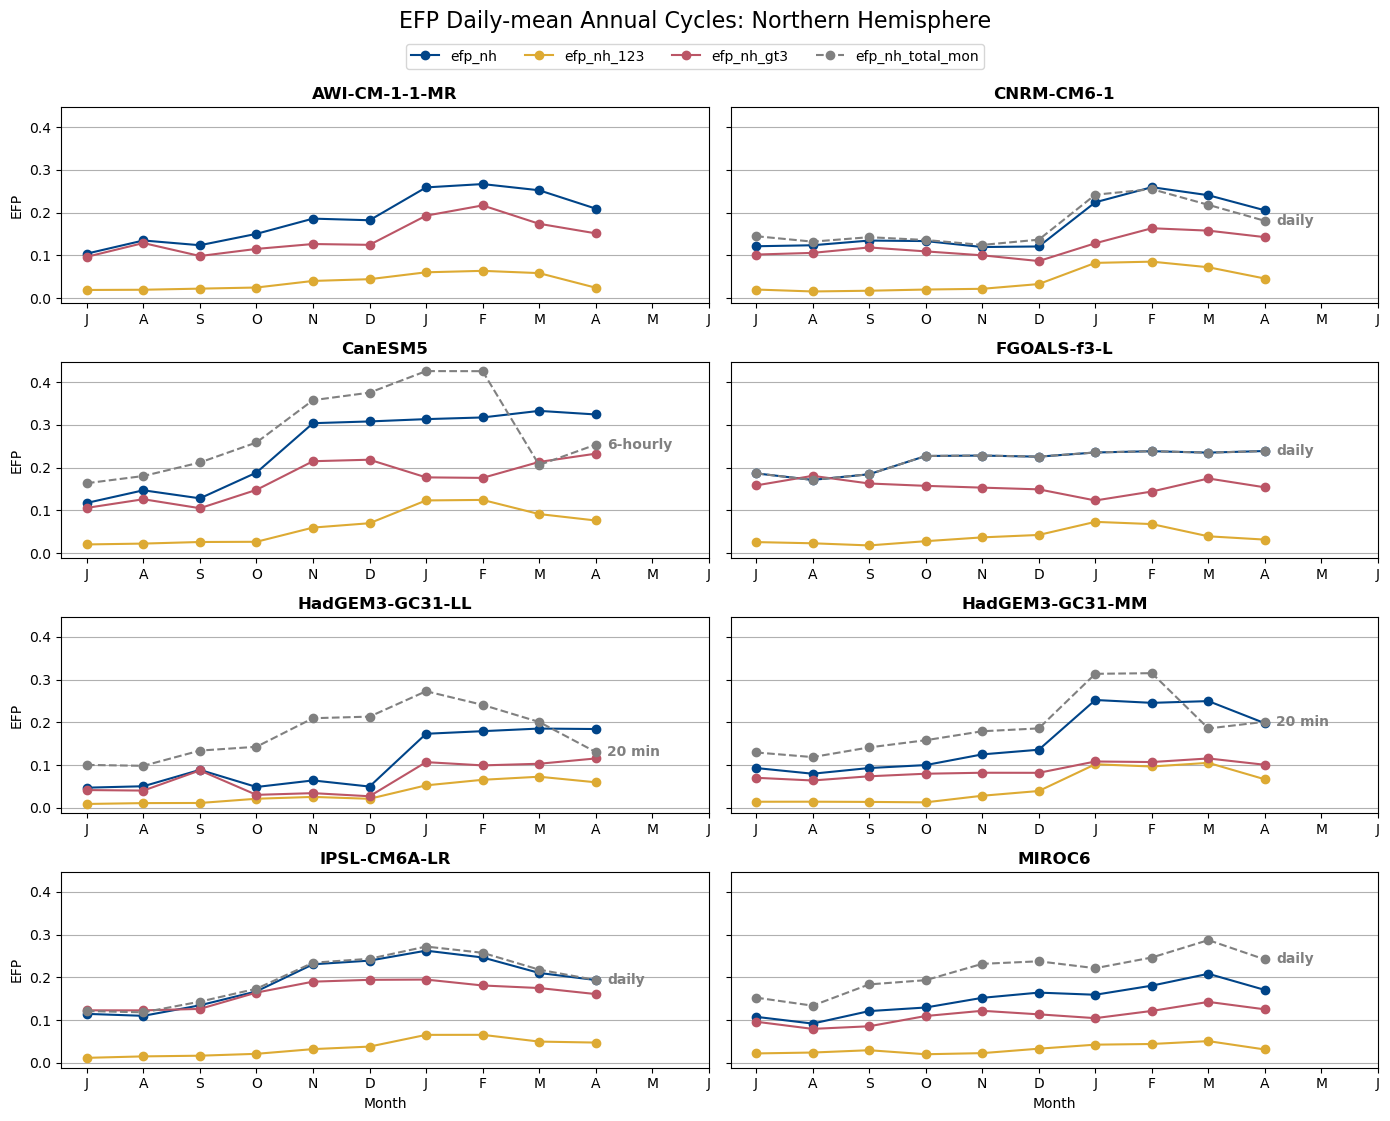

In [66]:
plot_efp_models_grid(
    models_dir="/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/PAMIP",
    hemisphere='nh'
)

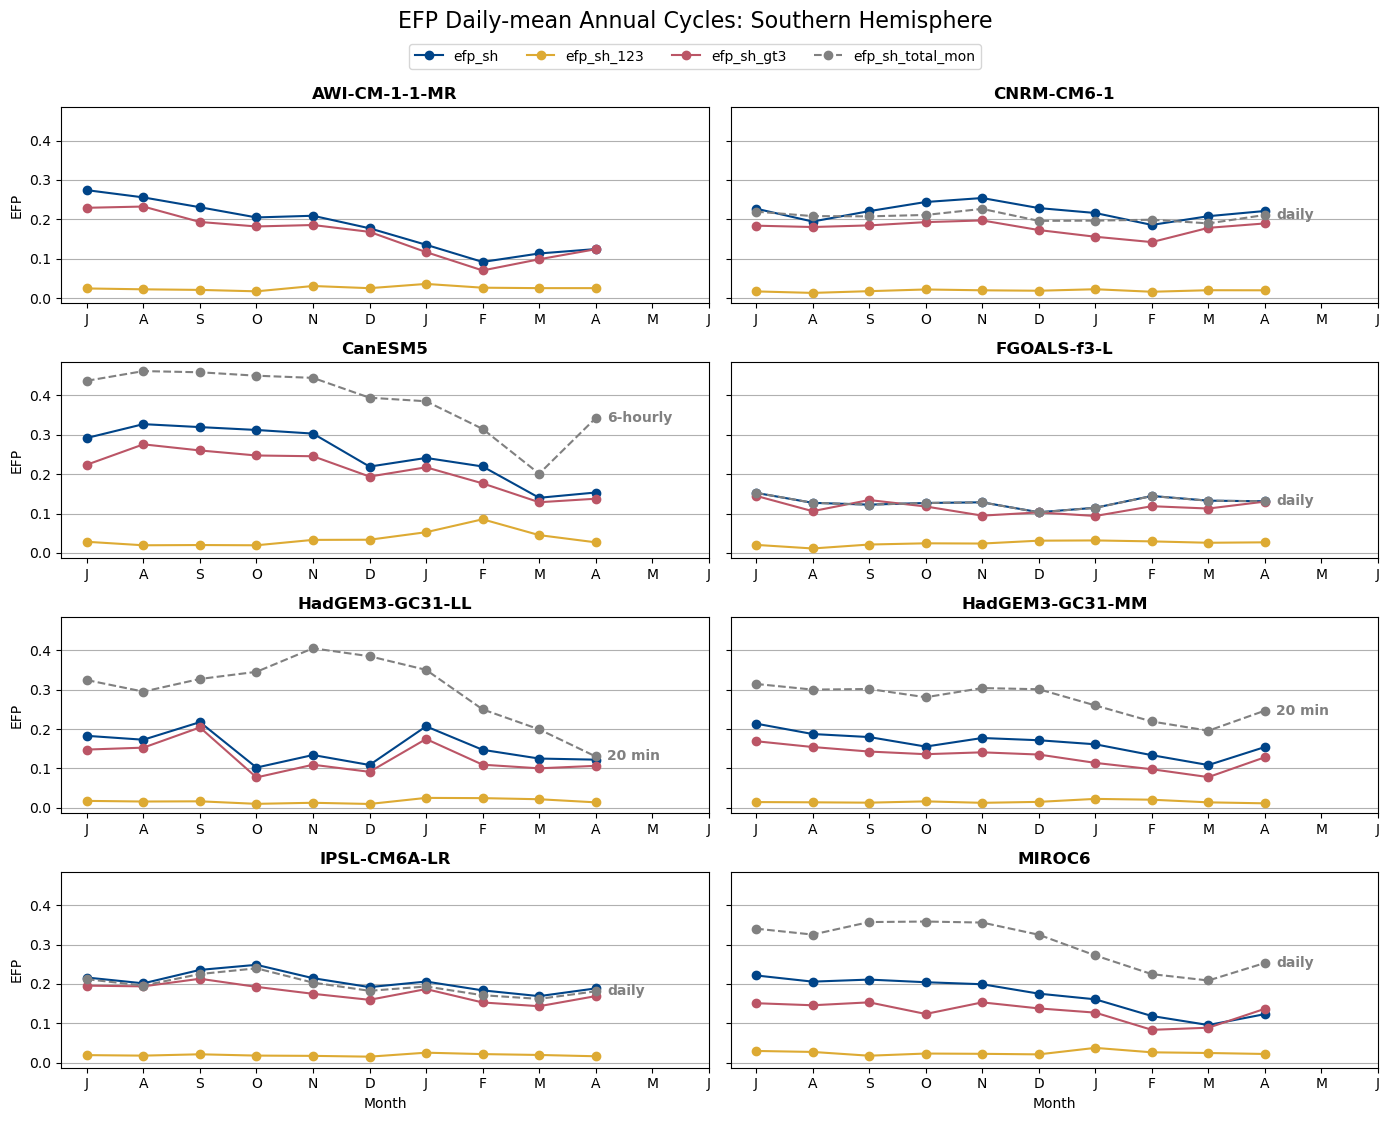

In [67]:
plot_efp_models_grid(
    models_dir="/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/PAMIP",
    hemisphere='sh'
)